<a href="https://colab.research.google.com/github/PetrovAlexey/Visualization/blob/main/IsoMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Isomap algorithm (MNIST Digit)

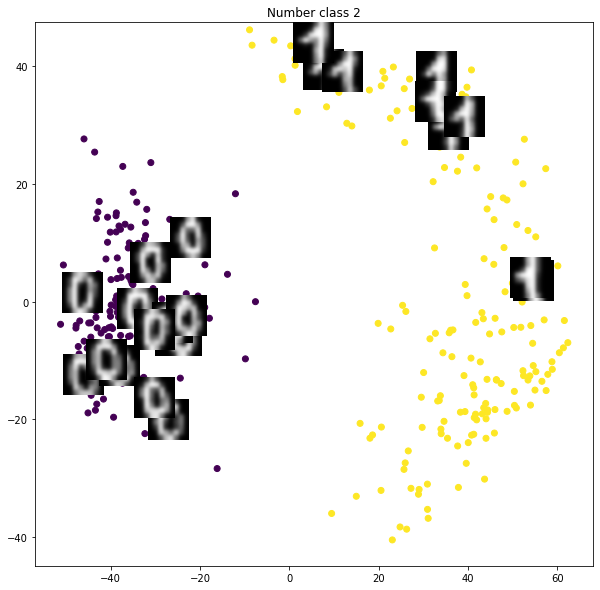

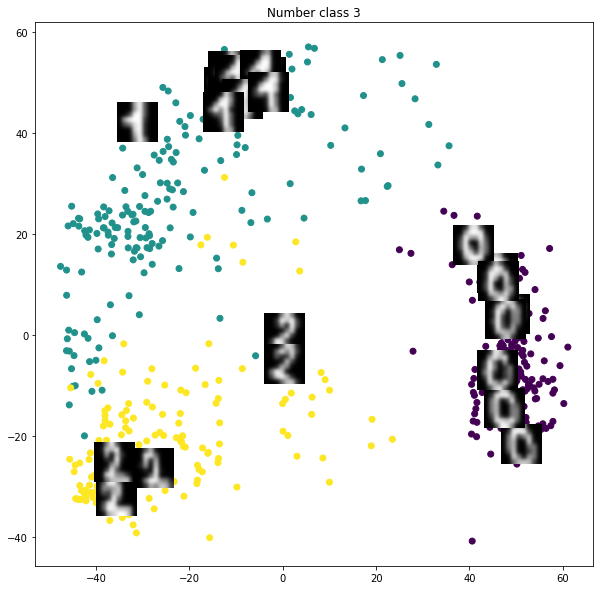

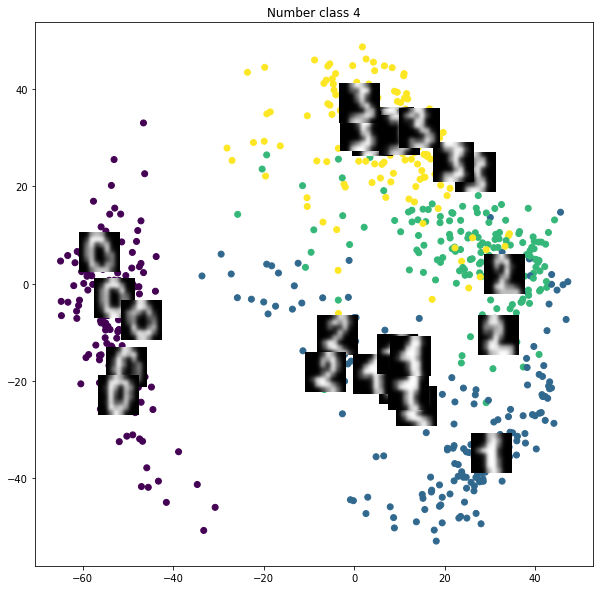

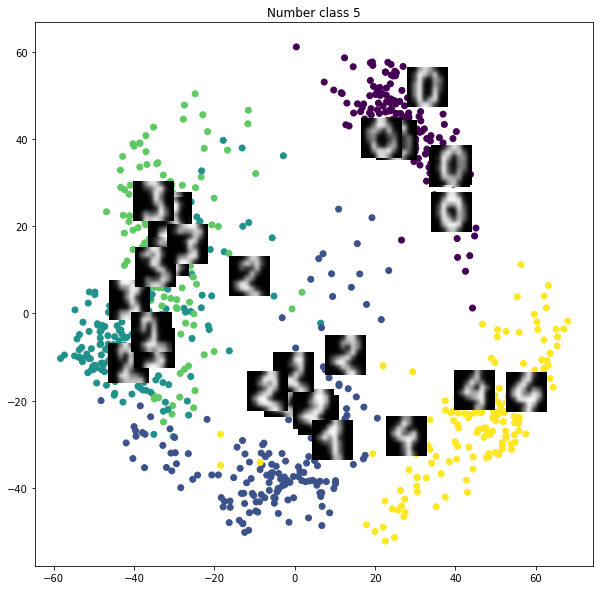

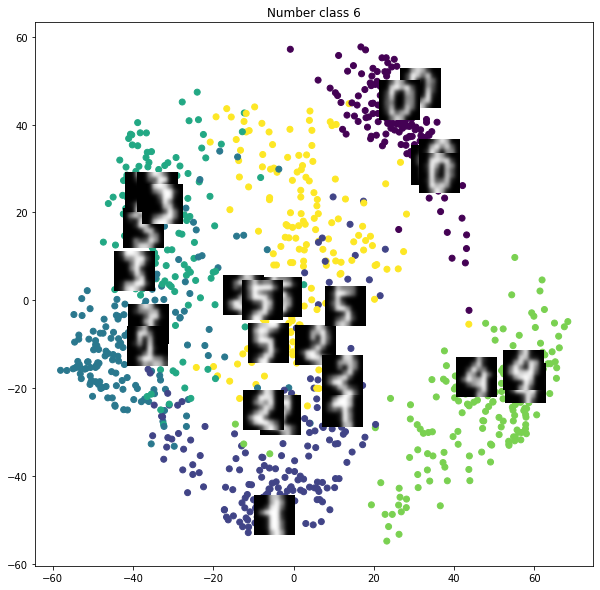

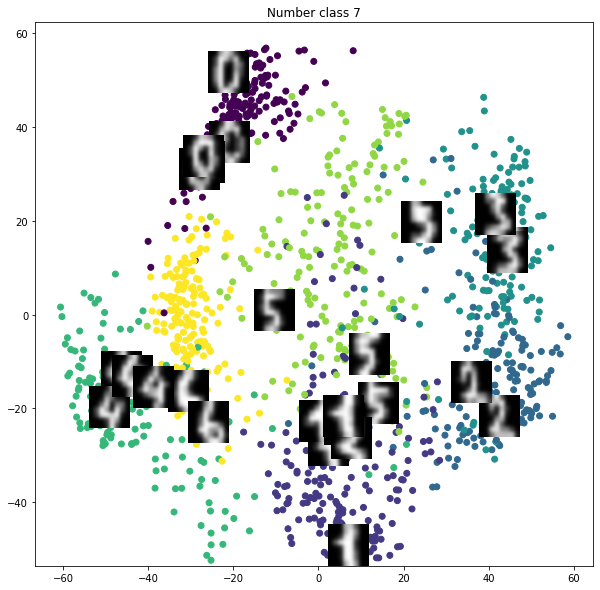

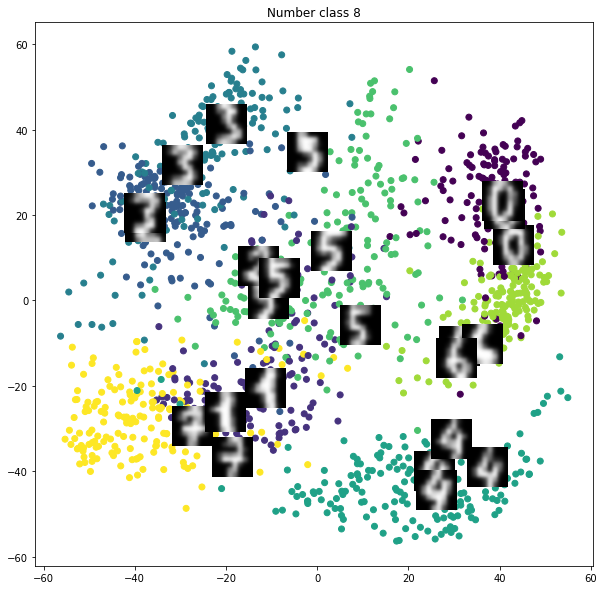

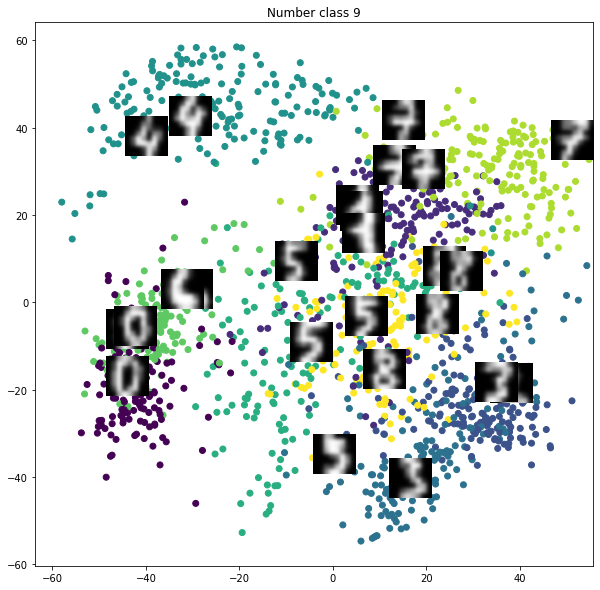

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils.graph_shortest_path import graph_shortest_path

def createGraph(data, k):
    size = data.shape[0]
    graph = np.zeros((size, size))
    for i in range(size):
        dis = data - np.tile(data[i], (size, 1))
        dis = np.linalg.norm(dis, axis=1)
        order = np.argsort(dis)
        dis = np.sort(dis)
        dist, order = dis[1:k + 1], order[1:k + 1]
        graph[i, order] = dist
        graph[order, i] = dist
        graph[i, i] = 0
    return graph

def projection(G, q):
    short = graph_shortest_path(G)
    for i in range(G.shape[0]): 
        G[i, :] = short[i]
    DSq = G ** 2
    totalMean = np.mean(DSq)
    columnMean = np.mean(DSq, axis=0)
    rowMean = np.mean(DSq, axis=1)
    matrix = np.zeros(DSq.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            matrix[i][j] = -0.5 * (DSq[i][j] - rowMean[i] - columnMean[j] + totalMean)
    eigVal, eigVec = np.linalg.eig(matrix)
    X = np.dot(eigVec[:, :q], np.sqrt(np.diag(eigVal[:q])))
    return X

def Isomap(data, K, d):
    G = createGraph(data, K)
    size = data.shape[0]
    short = graph_shortest_path(G)
    for i in range(size):
        G[i] = short[i]
    Y = projection(G, d)
    return Y

if __name__ == '__main__':
    datasets = [datasets.load_digits(n_class=i) for i in range(2,10)]
    d = 2
    K = 100
    for j, data in enumerate(datasets):
        Y = Isomap(data.data, K, d)
        x_size = (max(Y[:, 0]) - min(Y[:, 0])) * 0.08
        y_size = (max(Y[:, 1]) - min(Y[:, 1])) * 0.08

        fig = plt.figure()
        fig.set_size_inches(10, 10)
        ax = fig.add_subplot(111)

        for i in range(40):
          img_num = np.random.randint(0, 40)
          x0 = Y[img_num, 0] - (x_size / 2.)
          y0 = Y[img_num, 1] - (y_size / 2.)
          x1 = Y[img_num, 0] + (x_size / 2.)
          y1 = Y[img_num, 1] + (y_size / 2.)
          img = data.data[img_num, :].reshape(8, 8)
          ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='gaussian', zorder=100, extent=(x0, x1, y0, y1))
        
        ax.set_title(f"Number class {j+2}")
        ax.scatter(Y[:,0], Y[:,1], c=data.target, cmap='viridis')
        plt.show()